Inércia do modelo K-Means: 44.887604580852816

Distribuição dos Clusters:
cluster
2    59
1    50
0    36
3    33
Name: count, dtype: int64

Comparação entre Classes Originais e Clusters:
cluster   0   1   2   3
classe                 
1         2   0  57   0
2        34   2   2  33
3         0  48   0   0


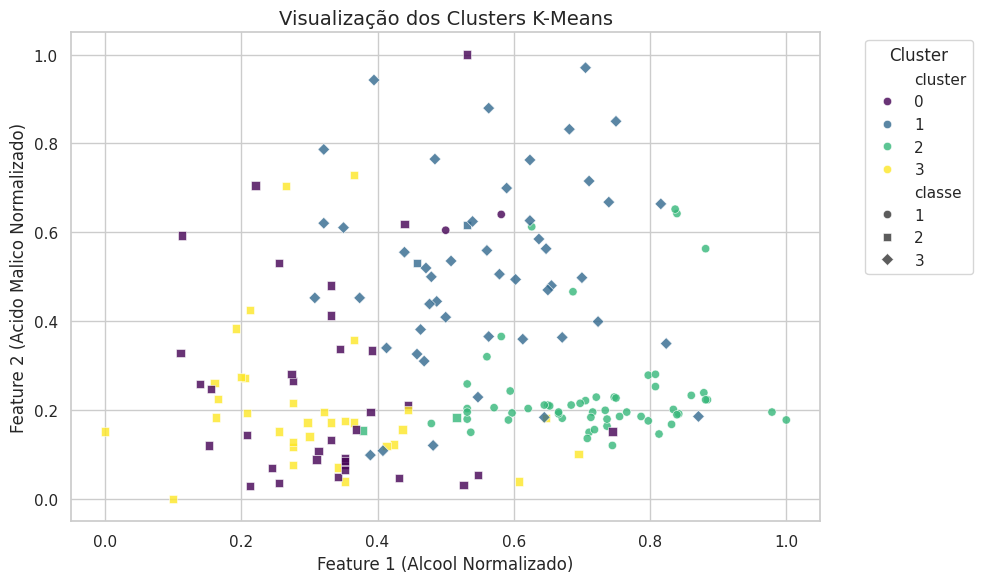


Coordenadas dos Centroides:
Cluster 0: [0.33976608 0.26624945 0.45008913 0.45375143 0.26781401 0.55316092
 0.45552039 0.30345912 0.4724851  0.17268677 0.45325203 0.66249491
 0.1703915 ]
Cluster 1: [0.55631579 0.51505929 0.56983957 0.55309278 0.31130435 0.24041379
 0.09852321 0.6045283  0.23545741 0.51061433 0.16764228 0.1570696
 0.2456776 ]
Cluster 2: [0.71123996 0.2357473  0.58460981 0.34308929 0.41267502 0.64582116
 0.55789173 0.30060761 0.47837245 0.358275   0.48174177 0.68907928
 0.60321816]
Cluster 3: [0.31204147 0.20936639 0.50364609 0.5267104  0.24209486 0.32371996
 0.2786728  0.57518582 0.28190422 0.1362085  0.48401084 0.45820846
 0.16737993]


<ipython-input-1-b758323d485b>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='alcool', data=vinhos, palette="viridis")


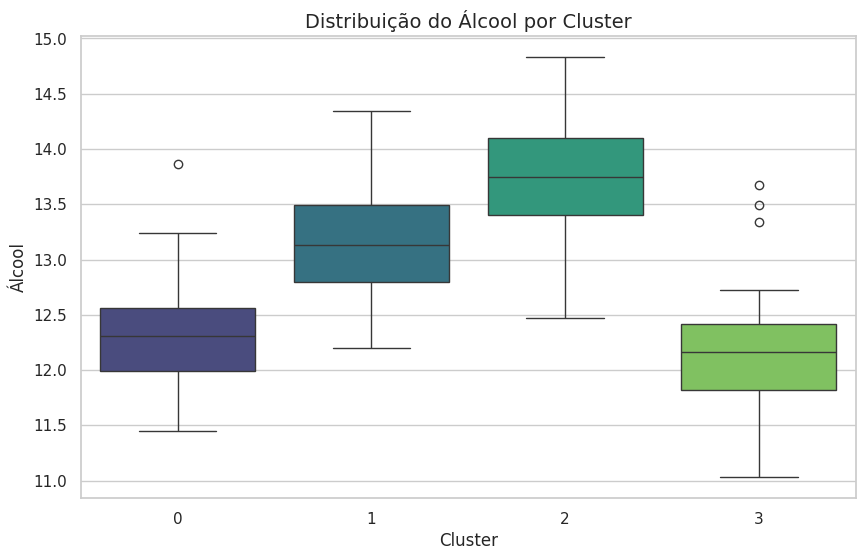

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Carregamento dos Dados
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
column_names_pt_br = [
    'classe', 'alcool', 'acido_malico', 'cinzas', 'alcalinidade_de_cinzas',
    'magnesio', 'fenois_totais', 'flavanoides', 'fenois_nao_flavanoides',
    'proantocianinas', 'intensidade_de_cor', 'matiz', 'od280_od315_de_vinhos_diluidos',
    'prolina'
]

vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': object})

# 1. Normalização dos Dados
X = vinhos.drop('classe', axis=1)  # Remover a coluna classe para o agrupamento
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 2. Aplicação do K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
vinhos['cluster'] = kmeans.fit_predict(X_scaled)

# Apresentar a inércia do modelo
print(f'Inércia do modelo K-Means: {kmeans.inertia_}')

# 3. Análise dos Clusters
cluster_counts = vinhos['cluster'].value_counts()
print("\nDistribuição dos Clusters:")
print(cluster_counts)

# 4. Comparação com Classes Originais
comparacao = pd.crosstab(vinhos['classe'], vinhos['cluster'])
print("\nComparação entre Classes Originais e Clusters:")
print(comparacao)

# Visualização dos Clusters
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_scaled[:, 0], y=X_scaled[:, 1], hue=vinhos['cluster'], palette="viridis",
    style=vinhos['classe'], markers=['o', 's', 'D'], alpha=0.8
)
plt.title("Visualização dos Clusters K-Means", fontsize=14)
plt.xlabel("Feature 1 (Alcool Normalizado)")
plt.ylabel("Feature 2 (Acido Malico Normalizado)")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Insights Adicionais
# Exibir o centroide de cada cluster
centroids = kmeans.cluster_centers_
print("\nCoordenadas dos Centroides:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")

# Visualizar a relação de cada cluster com uma variável
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='alcool', data=vinhos, palette="viridis")
plt.title("Distribuição do Álcool por Cluster", fontsize=14)
plt.xlabel("Cluster")
plt.ylabel("Álcool")
plt.show()
